<a href="https://colab.research.google.com/github/kcat4lina/Spin-Win/blob/main/Spin%26Win_game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

How many times do you want to play? 27
Your spin: ['Bell', 'Orange', 'Bar']
You lose.
Press Enter to spin again...
Your spin: ['Bar', 'Lemon', 'Plum']
You lose.
Press Enter to spin again...
Your spin: ['Lemon', 'Cherry', 'Lemon']
You lose.
Press Enter to spin again...
Your spin: ['Bar', 'Lemon', 'Lemon']
You lose.
Press Enter to spin again...
Press Enter to spin again...
Your spin: ['Bell', 'Bar', 'Bar']
You lose.
Your spin: ['Lemon', 'Bell', 'Lemon']
You lose.
Press Enter to spin again...
Your spin: ['Cherry', 'Plum', 'Bell']
You lose.
Press Enter to spin again...
Your spin: ['Plum', 'Plum', 'Plum']
You win!
Press Enter to spin again...
Your spin: ['Cherry', 'Orange', 'Plum']
You lose.
Press Enter to spin again...
Your spin: ['Bell', 'Lemon', 'Bar']
You lose.
Press Enter to spin again...
Your spin: ['Plum', 'Bell', 'Plum']
You lose.
Press Enter to spin again...
Your spin: ['Orange', 'Bar', 'Bell']
You lose.
Press Enter to spin again...
Your spin: ['Cherry', 'Bar', 'Orange']
You lose.


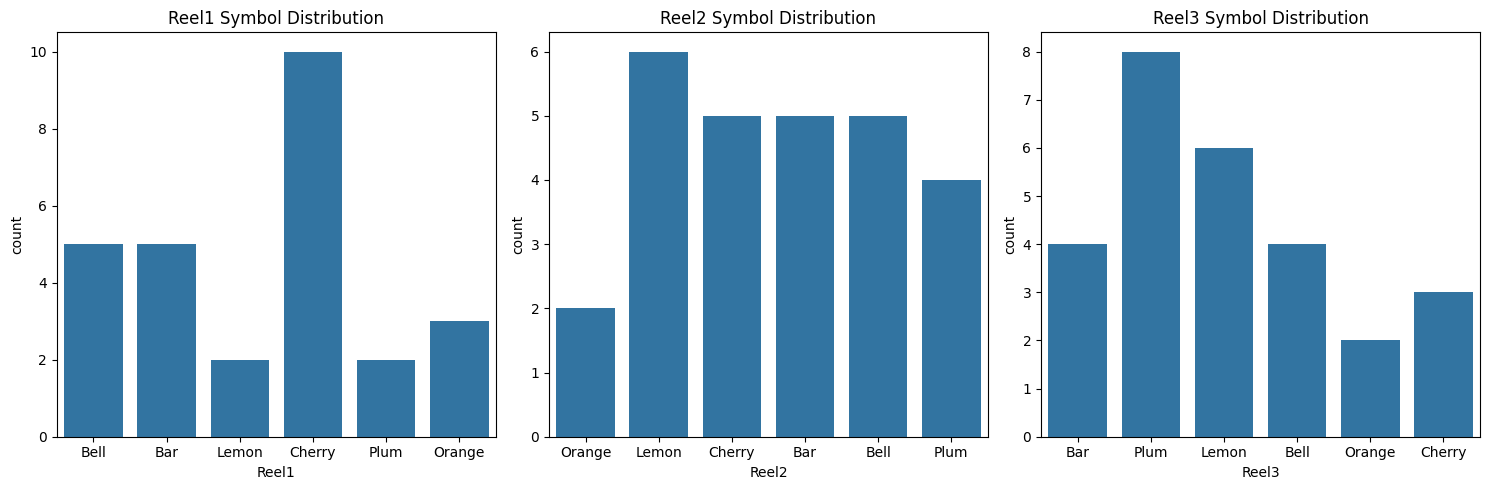

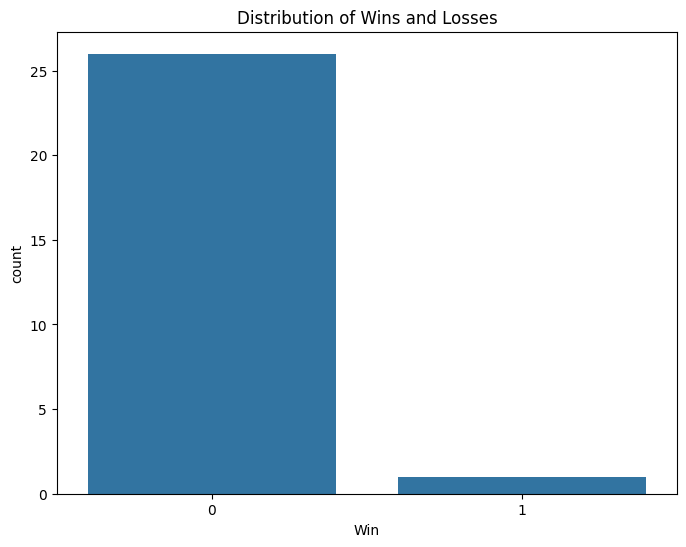

Accuracy: 1.0
Confusion Matrix:
 [[6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



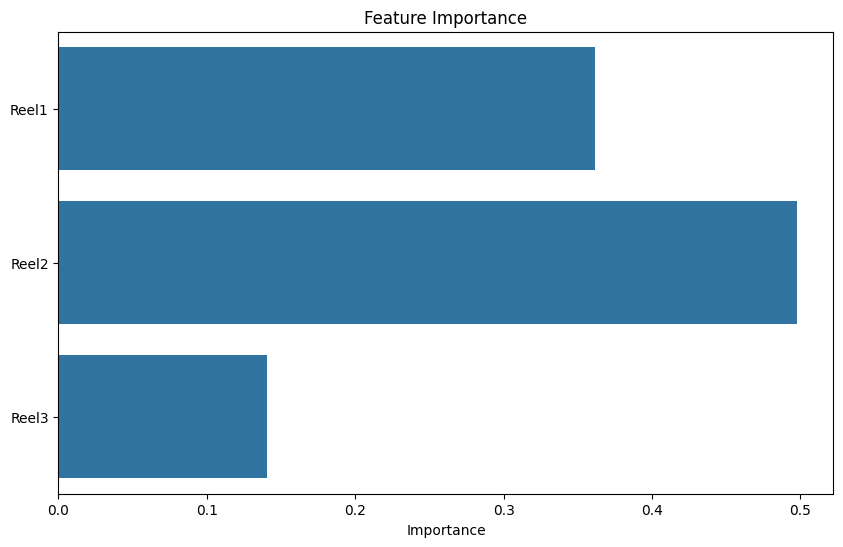


New spin: ['Bar', 'Lemon', 'Lemon']
Prediction: Lose


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [2]:
import random
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
# Define the symbols
symbols = ['Cherry', 'Lemon', 'Orange', 'Plum', 'Bell', 'Bar']

def spin_slot_machine():
    """Generate a random slot machine spin result."""
    return [random.choice(symbols) for _ in range(3)]

def play_game():
    """Play the slot machine game and return the result."""
    spin = spin_slot_machine()
    print(f"Your spin: {spin}")
    win = all(symbol == spin[0] for symbol in spin)
    print("You win!" if win else "You lose.")
    return spin, int(win)

def gather_data(num_plays):
    """Gather data from multiple plays."""
    data = []
    for _ in range(num_plays):
        spin, win = play_game()
        data.append(spin + [win])
        input("Press Enter to spin again...")  # Pause for user input
    return pd.DataFrame(data, columns=['Reel1', 'Reel2', 'Reel3', 'Win'])

# Play the game and gather data
num_plays = int(input("How many times do you want to play? "))
df_spins = gather_data(num_plays)

# Data Visualization: Distribution of Symbols in Each Reel
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, reel in enumerate(['Reel1', 'Reel2', 'Reel3']):
    sns.countplot(x=reel, data=df_spins, ax=axs[i])
    axs[i].set_title(f'{reel} Symbol Distribution')
plt.tight_layout()
plt.show()

# Data Visualization: Distribution of Wins and Losses
plt.figure(figsize=(8, 6))
sns.countplot(x='Win', data=df_spins)
plt.title('Distribution of Wins and Losses')
plt.show()

# Data Preprocessing
encoder = LabelEncoder()
encoder.fit(symbols)
for reel in ['Reel1', 'Reel2', 'Reel3']:
    df_spins[reel] = encoder.transform(df_spins[reel])

X = df_spins[['Reel1', 'Reel2', 'Reel3']]
y = df_spins['Win']

# Model Training and Evaluation
def train_and_evaluate_model(X, y):
    if len(np.unique(y)) < 2:
        print("Not enough different outcomes to train a model. Need both wins and losses.")
        return None, None, None

    if len(X) < 10:  # Arbitrary small number, adjust as needed
        print("Not enough data to split into train and test sets.")
        return None, None, None

    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train_scaled, y_train)

        y_pred = model.predict(X_test_scaled)

        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        class_report = classification_report(y_test, y_pred)

        print("Accuracy:", accuracy)
        print("Confusion Matrix:\n", conf_matrix)
        print("Classification Report:\n", class_report)

        return model, scaler, accuracy
    except ValueError as e:
        print(f"Error in training model: {e}")
        return None, None, None

# After gathering data and preprocessing
X = df_spins[['Reel1', 'Reel2', 'Reel3']]
y = df_spins['Win']

model, scaler, accuracy = train_and_evaluate_model(X, y)

if model is not None and scaler is not None:
    # Feature Importance
    feature_importance = model.feature_importances_
    feature_names = ['Reel1', 'Reel2', 'Reel3']

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance, y=feature_names)
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.show()

    # Predict function
    def predict_spin(reel1, reel2, reel3):
        """Predict the outcome of a given spin."""
        encoded_reels = encoder.transform([reel1, reel2, reel3])
        scaled_reels = scaler.transform([encoded_reels])
        prediction = model.predict(scaled_reels)[0]
        return "Win" if prediction == 1 else "Lose"

    # Test the prediction
    new_spin = spin_slot_machine()
    print(f"\nNew spin: {new_spin}")
    result = predict_spin(*new_spin)
    print(f"Prediction: {result}")
else:
    print("Could not train model due to insufficient data.")
    print("Current data summary:")
    print(df_spins['Win'].value_counts())
    print("\nPlease play more rounds to gather more data.")